In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
torch.set_default_dtype(torch.float64)
import torch.nn as nn
import copy
import random

In [4]:
import config as cfg
from model import DeepNN
from utils import relative_l2, set_seed
from train_reg import train_model_reg
from train_pde import train_model_pde

In [8]:
set_seed(0)
model = DeepNN().to(cfg.device_name)
model = train_model_reg(model, Nfit=150, lr=1e-2)

lbfgs : 0 - ref_rl2 5.6094e-01 
lbfgs : 50 - ref_rl2 4.5090e-03 
lbfgs : 100 - ref_rl2 1.8694e-03 
lbfgs : 149 - ref_rl2 7.7425e-04 


In [9]:
set_seed(50)
model_cur = DeepNN().to(cfg.device_name)
model_cur.load_state_dict(copy.deepcopy(model.state_dict()))
model_cur = train_model_pde(model_cur, Nfit=300, lr=1e-1)

adam : 0 - ref_rl2 7.8071e-04 - pde 1.7055e-02 - lbc 2.7747e-05 - rbc 5.1568e-04 - tbc 1.9660e-04 - bbc 1.1370e-04
adam : 10 - ref_rl2 7.3480e-04 - pde 1.6066e-02 - lbc 1.9534e-05 - rbc 2.8590e-04 - tbc 1.2464e-04 - bbc 8.9035e-05
adam : 20 - ref_rl2 6.5239e-04 - pde 1.4261e-02 - lbc 1.5008e-05 - rbc 2.4008e-04 - tbc 9.1254e-05 - bbc 7.1656e-05
adam : 30 - ref_rl2 5.3452e-04 - pde 1.1676e-02 - lbc 9.5322e-06 - rbc 2.8190e-04 - tbc 5.0570e-05 - bbc 4.7368e-05
adam : 40 - ref_rl2 4.7546e-04 - pde 1.0379e-02 - lbc 7.8167e-06 - rbc 1.6743e-04 - tbc 5.1286e-05 - bbc 2.8110e-05
adam : 50 - ref_rl2 4.4500e-04 - pde 9.7129e-03 - lbc 5.6028e-06 - rbc 1.4330e-04 - tbc 3.0329e-05 - bbc 3.3733e-05
adam : 60 - ref_rl2 4.3370e-04 - pde 9.4672e-03 - lbc 3.8966e-06 - rbc 9.1507e-05 - tbc 2.1113e-05 - bbc 2.7308e-05
adam : 70 - ref_rl2 4.2047e-04 - pde 9.1771e-03 - lbc 3.6142e-06 - rbc 7.7221e-05 - tbc 1.6935e-05 - bbc 3.1295e-05
adam : 80 - ref_rl2 4.0982e-04 - pde 8.9421e-03 - lbc 3.1646e-06 - rbc 1.

In [10]:
X = cfg.X.detach().cpu()
Y = cfg.Y.detach().cpu()
E_reg = model(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_pinn = model_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_ref = cfg.E_ref.cpu()

In [11]:
print('Regression Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_reg)))
print('PINN Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_pinn)))

Regression Solution rl2: 7.7425e-04
PINN Solution rl2: 3.1866e-04


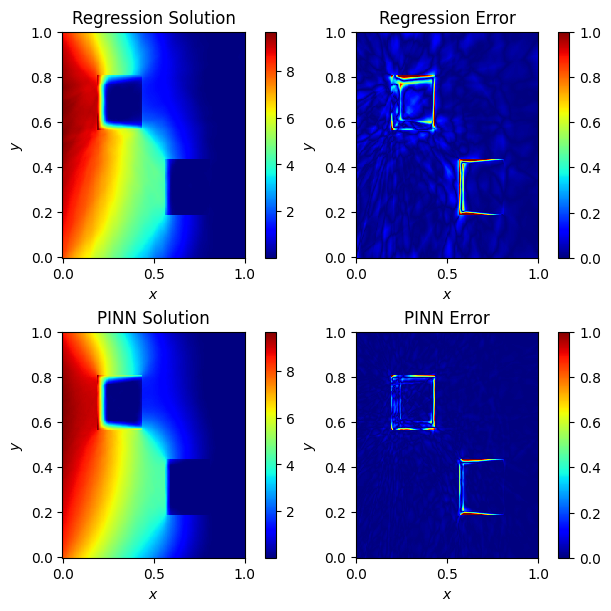

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = E_ref.min()
vmax = E_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, E_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (E_ref - E_reg).abs(), vmin=0, vmax=1.0, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, E_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (E_ref - E_pinn).abs(), vmin=0, vmax=1.0, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])